#**Drive Mount**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**INTALL UNICODE**

In [2]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=25aefae30c4e921f2b05f1d3a90113057b37f7c6ebec2f0f5df215f774dfc915
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [3]:
!pip install Unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 3.2 MB/s eta 0:00:00


#**Download Stop Words**

In [4]:
import nltk
from nltk.corpus import stopwords

# Download the Bengali stopwords list
nltk.download('stopwords')
stop_words = set(stopwords.words('bengali'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#**Import Libraries**

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer
from time import time
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
#plt.style.use('ggplot')
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import linear_model
import tensorflow as tf
import h5py
import csv
import math
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
import glob
from time import time
from collections import defaultdict
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

#**Data Load**

In [28]:
DATA_PATH = '/content/drive/MyDrive/data/cyberbulling bangla dataset.xlsx'
df = pd.read_excel(DATA_PATH)

df.iloc[1:10,:]

comment    Category  Gender  \
1  ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...      Singer    Male   
2                       অরে বাবা, এই টা কোন পাগল????       Actor  Female   
3  ১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...  Politician    Male   
4  যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...  Politician    Male   
5                         অন্যরকম .. ভালো লাগলো ..❤️      Singer    Male   
6  সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...       Actor  Female   
7  মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipay...       Actor  Female   
8  ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...       Actor  Female   
9      হিরো আলম তুমি এগিয়ে চলো, আমরা আছি তোমার সাথে।      Social    Male   

   comment react number      label  
1                   2.0  not bully  
2                   2.0  not bully  
3                   1.0  not bully  
4                   3.0      troll  
5                   1.0  not bully  
6                   9.0      troll  
7                   0.0  not bully  
8                   4.0  religious  
9                   0.0  not bully

Label WISE DATA

In [29]:
sorted_counts = df['label'].value_counts()
print(sorted_counts)

not bully    15340
troll        10462
sexual        8928
religious     7578
threat        1693
Name: label, dtype: int64


Visual Representation(Label Wise)

<Axes: xlabel='label', ylabel='count'>

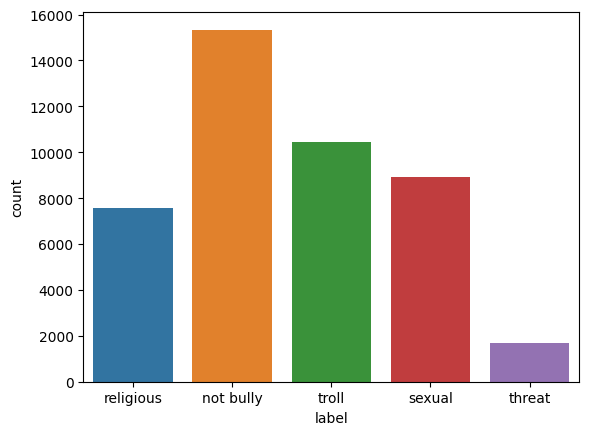

In [30]:
sns.countplot(x='label',data=df)

#**Preprocessing**

In [31]:
df.loc[df['Gender'] == 'male', 'Gender'] = 'Male'

In [32]:
# Update the label column
df.loc[df['label'] == 'troll', 'label'] = 'bully'
df.loc[df['label'] == 'religious', 'label'] = 'bully'
df.loc[df['label'] == 'threat', 'label'] = 'bully'
df.loc[df['label'] == 'sexual', 'label'] = 'bully'

In [33]:
df['label'] = df.label.map({'bully': 1, 'not bully': 0})

In [34]:
df = df.drop(df.columns[[3]],axis = 1) # removing unnecessery columns
df.head(10)

comment    Category  Gender  \
0  আওয়ামী লীগ স্বৈরাচারী সরকার যতো দিন ক্ষমতায় থা...  Politician    Male   
1  ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...      Singer    Male   
2                       অরে বাবা, এই টা কোন পাগল????       Actor  Female   
3  ১লক্ষ ৬হাজার মামলা নিয়ে ৩৬ লক্ষ নেতা কর্মীরা ১...  Politician    Male   
4  যানবাহন বন্ধ করার পরও যদি এরকম সমাবেশের লোক হয...  Politician    Male   
5                         অন্যরকম .. ভালো লাগলো ..❤️      Singer    Male   
6  সাংবাদিক ভাইদের বলছি এই সংবাদ গুলি প্রচার না ক...       Actor  Female   
7  মোহাম্মদ কফিল উদ্দীন মাহমুদRidwan RomelDwaipay...       Actor  Female   
8  ঢাকায় এত ঘনো ঘনো আগুন লাগার মূল কারন টা এতদিনে...       Actor  Female   
9      হিরো আলম তুমি এগিয়ে চলো, আমরা আছি তোমার সাথে।      Social    Male   

   label  
0      1  
1      0  
2      0  
3      0  
4      1  
5      0  
6      1  
7      0  
8      1  
9      0

For Multiclass

In [35]:
# df["label"].replace({"not bully": "0", "religious": "1","troll": "2","threat": "3","sexual": "4"})

In [36]:
check_nan = df['comment'].isnull().values.any() # Check Nan values
check_nan2 = df['label'].isnull().values.any() # Check Nan values
print(check_nan)
print(check_nan2)

False
False


In [37]:
df.shape

(44001, 4)

In [38]:
sorted_counts = df['label'].value_counts()
print(sorted_counts)

1    28661
0    15340
Name: label, dtype: int64


In [39]:
#display non-null values
df = df.dropna()


#**Bullying Rate based on category**

<Axes: xlabel='Category', ylabel='count'>

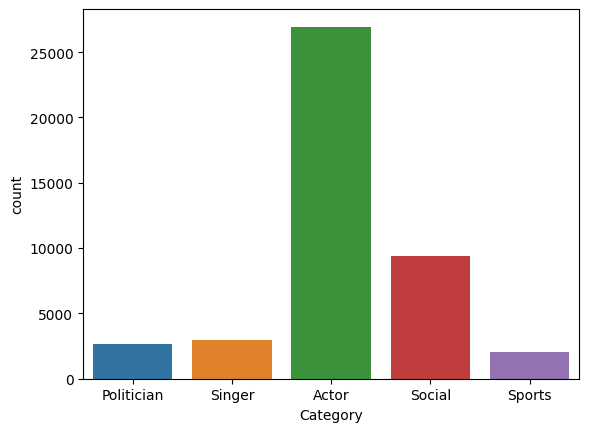

In [40]:
sns.countplot(x='Category',data=df)

#**Bullying Rate (Male and Female)**

Text(-0.4, 0, 'Total Documents: 44001')

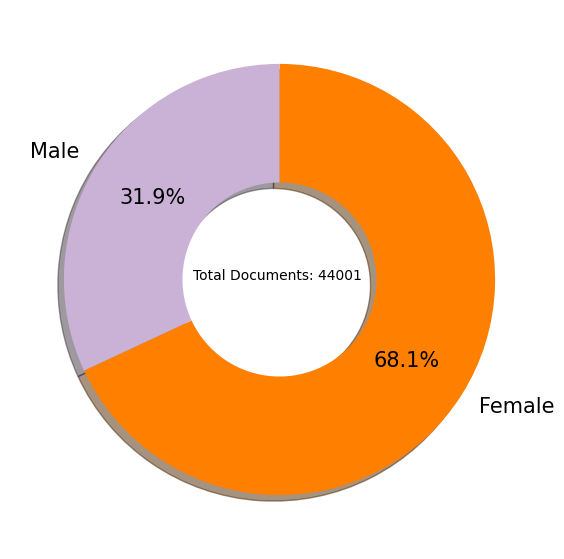

In [41]:
plt.figure(figsize = (7,7))
sorted_counts = df['Gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, wedgeprops = {'width' : 0.55},
       autopct='%1.1f%%', pctdistance = 0.7, textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
        colors = sns.color_palette("Paired")[7:])
plt.text(x = -0.40, y = 0, s = 'Total Documents: {}'.format(df.shape[0]))


#**Distribution of Documents in the Dataset based on label**

<Axes: xlabel='label', ylabel='count'>

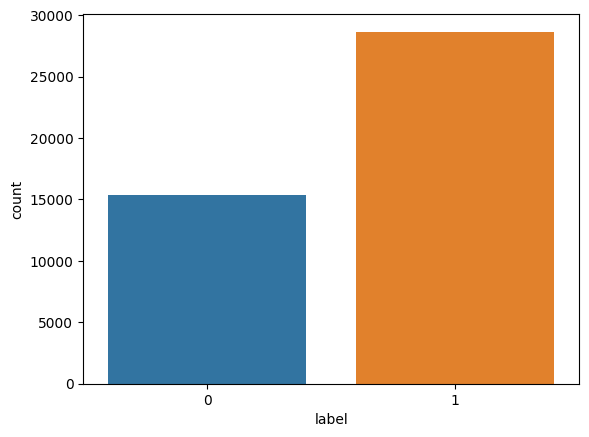

In [42]:
sns.countplot(x='label',data=df)

#**Data Cleaning**

#**Removing Special Character**

In [43]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations

                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)

    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''

    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [44]:
df['comment'] = df.comment.apply(lambda x: preprocessing(str(x)))

#**Removing Stop Words**

In [45]:
stop_words_list = list(stop_words)

In [46]:
def stopwordRemoval(text):
    x=str(text)
    l=x.split()

    stm=[elem for elem in l if elem not in stop_words_list]

    out=' '.join(stm)

    return str(out)

In [47]:
df['comment'] = df.comment.apply(lambda x: stopwordRemoval(str(x)))

In [48]:
df.head(4)

comment    Category  Gender  \
0  আওয়ামী লীগ স্বৈরাচারী সরকার যতো ক্ষমতায় ততো হত...  Politician    Male   
1                     ঘরে শুট কেমন লেগেছে ক্যামেরাতে      Singer    Male   
2                                   অরে বাবা টা পাগল       Actor  Female   
3  মামলা নেতা কর্মীরা বছর মাথা উঁচু দাড়িয়ে দলটির ...  Politician    Male   

   label  
0      1  
1      0  
2      0  
3      0

In [49]:
#counting text length
df['count'] = df['comment'].str.split().str.len()
# Remove the text with words less than 5
df= df.loc[df['count']>5]

#**Stemming bangla words**

In [50]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer
## stemmer function
def stem_text (x):
  stmr = stemmer.BanglaStemmer()
  words=x.split(' ')
  stm = stmr.stem(words)
  words=(' ').join(stm)
  return words

In [51]:
df['comment']=df['comment'].apply(stem_text)

Streaming output truncated to the last 5000 lines.
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied third rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied 

In [52]:
df.head(10)

comment    Category  Gender  \
0   আওয়ামী লীগ স্বৈরাচারী সরক যত ক্ষমতায় তত হত্যাক...  Politician    Male   
3   মামলা নেতা কর্মী বছর মাথা উঁচু দাড়া দল নাম বাং...  Politician    Male   
4   যানবাহন বন্ধ পর এরকম সমাবেশের লোক খারাপ ভালো জ...  Politician    Male   
6   সাংবাদিক ভাই বল সংবাদ প্রচ করলে কিআর থ গ্রেডের...       Actor  Female   
8   ঢাকায় ঘনো ঘনো আগুন লাগা মূল কারন টা এতদিনে পার...       Actor  Female   
9                           হিরো আলম এগা চলো আছি সাথে      Social    Male   
10  খানকি এই জানলেতু খানকি বিত্তি কিভাবে করতিআর আল...       Actor  Female   
11  বাতাসে অক্সিজ তোর নিঃশ্বাস বন্ধ সব বিশ্বাস করব...       Actor  Female   
13                  রমজান মাসে এমনে নির দরক সুবাধে বল       Actor  Female   
14  সবা চুপঅসভ্য দলতোমরা জাননা মিথিলে কানে কানে নি...       Actor  Female   

    label  count  
0       1     15  
3       0     13  
4       1     11  
6       1     29  
8       1     18  
9       0      6  
10      1     13  
11      1     13  
13      0      7  
14      0      9

#**DATA visualization**

#**Word Cloud**

In [53]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Function for generating word clouds
def generate_wordcloud(data,title):
  data = [tuple(x) for x in data.values]
  #Bangla Wordcloud
  wc = WordCloud(font_path="/content/drive/MyDrive/data/Siyamrupali.ttf",width=1080, height=720, max_words=150,colormap="Dark2").generate_from_frequencies(dict(data))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap("Word Cloud of "+title,60)),fontsize=13)
  plt.show()

<ipython-input-54-b636b58ee45c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['comment'].apply(lambda x:str(x).split())


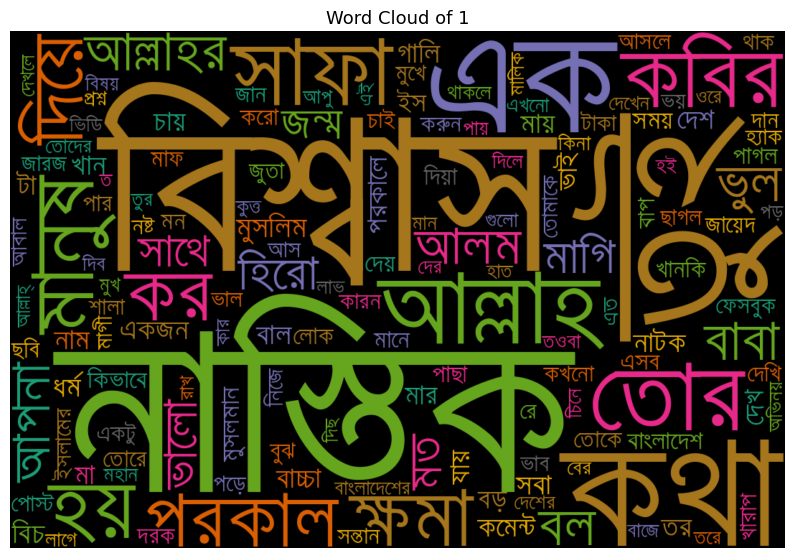

<ipython-input-54-b636b58ee45c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['temp_list'] = temp['comment'].apply(lambda x:str(x).split())


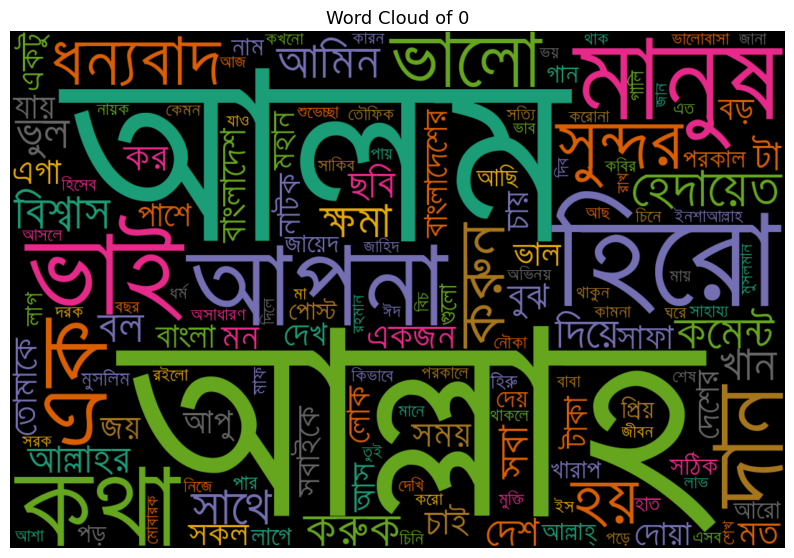

In [54]:
from collections import Counter
category_list = df.label.unique()
for i in category_list:
    temp=df.loc[df['label'] == i]
    temp['temp_list'] = temp['comment'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(500000),columns=['Common_words', 'count'])
    temp.columns = ['Common_words','count']
    generate_wordcloud(temp,str(i))


#**TOP 20 used words**

In [55]:
df['temp_list'] = df['comment'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Reds')

#**Count of Texts in Each Category**

In [56]:
print("IN Data SET...")
temp1 = df.groupby('label').count()['comment'].reset_index().sort_values(by='comment',ascending=False)
temp1.style.background_gradient(cmap='Purples')

IN Data SET...


#**Funnel Chart of Data Distribution**

In [57]:
from plotly import graph_objs as go
print("On Train Set....")
fig = go.Figure(go.Funnelarea(
    text =temp1.label,
    values = temp1.comment,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution on data Set where 1=bully and 0=not bully"}
    ))
fig.show()

On Train Set....


#**Histogram Analysis Based on Text Length**

In [58]:
fig = go.Figure(layout=dict(title=dict(text="Text Length Histogram of dataset")))
fig.add_trace(go.Histogram(x=df['count']))

# Set the figure size using update_layout
fig.update_layout(
    width=800,  # Set your desired width in pixels
    height=600  # Set your desired height in pixels
)

fig.show()

#**MODELS**

#**Data Splitting (90:10)**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df['comment'], df['label'],stratify=df["label"] ,test_size=0.10, random_state=261)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 24399
Number of rows in the training set: 21959
Number of rows in the test set: 2440


In [60]:
sorted_counts = X_train.iloc[8]
print(sorted_counts)

শালা এক পাগল সিনেমা রাস্ত কুত্তা দেখতো বাল ছবি


After using stratihy method, counting the number o comments.

In [61]:
sorted_counts = y_test.value_counts()
print(sorted_counts)

1    1768
0     672
Name: label, dtype: int64


In [62]:
sorted_counts = y_train.value_counts()
print(sorted_counts)

1    15912
0     6047
Name: label, dtype: int64


#TF-IDF for feature extraction

In [63]:
text_transformer = TfidfVectorizer(ngram_range=(1, 3),lowercase=True, max_features=10000)
#%%time
X_train_text = text_transformer.fit_transform(X_train.values)
X_test_text = text_transformer.transform(X_test.values)

#**SGDClassifier**

Precision of sgd_classifie model:
 0.8253424657534246
Recall of sgd_classifier model:
 0.954185520361991
F1score of sgd_classifier model:
 0.885099685204617
Accuracy of sgd_classifier model: 0.8204918032786885
sgd_classifier model Report:
               precision    recall  f1-score   support

           0       0.80      0.47      0.59       672
           1       0.83      0.95      0.89      1768

    accuracy                           0.82      2440
   macro avg       0.81      0.71      0.74      2440
weighted avg       0.82      0.82      0.80      2440



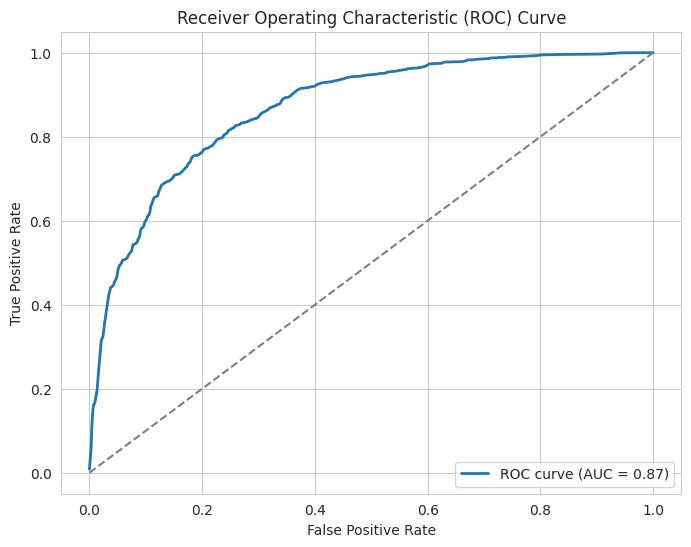

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Initialize and train sgd_classifier
sgd_classifier = SGDClassifier(loss='hinge', max_iter=1000, random_state=42)
sgd_classifier.fit(X_train_text, y_train)
sgd_classifier_predictions = sgd_classifier.predict(X_test_text)
F1score = f1_score(y_test, sgd_classifier_predictions)
Precision= precision_score(y_test, sgd_classifier_predictions)
Recall = recall_score(y_test, sgd_classifier_predictions)
print("Precision of sgd_classifie model:\n",Precision)
print("Recall of sgd_classifier model:\n", Recall)
print("F1score of sgd_classifier model:\n",F1score)


accuracy = accuracy_score(y_test, sgd_classifier_predictions)
print("Accuracy of sgd_classifier model:", accuracy)

# Calculate classification report
report = classification_report(y_test, sgd_classifier_predictions)
print("sgd_classifier model Report:\n", report)

y_score = sgd_classifier.decision_function(X_test_text)


# ROC curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

import pandas as pd
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Create the ROC curve plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_df, lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation(10 CV)

In [ ]:
scores = cross_val_score(sgd_classifier, X_train_text ,y_train, cv=10)
print ("Cross-validated scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validated scores: [0.82513661 0.81557377 0.81102004 0.81375228 0.81876138 0.82149362
 0.81056466 0.82149362 0.80965392 0.82050114]
Mean accuracy: 0.8167951047877484


Confusion Matrix

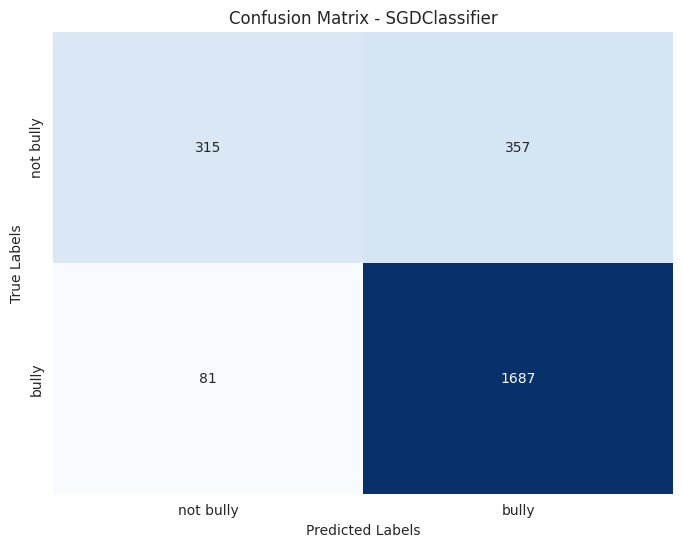

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 # Compute confusion matrix
conf_matrix = confusion_matrix(y_test, sgd_classifier_predictions)
 # Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['not bully', 'bully'], yticklabels=['not bully', 'bully'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ' + sgd_classifier.__class__.__name__)
plt.show()

#**Logistic Regression**

Precision of Logistic Regression_classifie model:
 0.8298714144411474
Recall of Logistic Regressionp_classifier model:
 0.9490950226244343
F1score of Logistic Regression_classifier model:
 0.8854881266490765
Accuracy of Logistic Regression_classifier model: 0.8221311475409836
Logistic Regression_classifier model Report:
               precision    recall  f1-score   support

           0       0.78      0.49      0.60       672
           1       0.83      0.95      0.89      1768

    accuracy                           0.82      2440
   macro avg       0.81      0.72      0.74      2440
weighted avg       0.82      0.82      0.81      2440



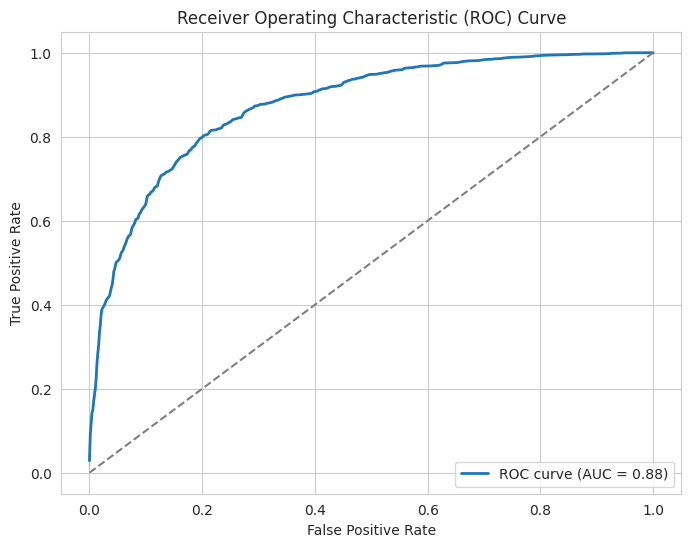

In [ ]:
from sklearn.metrics import classification_report
lgr=LogisticRegression(max_iter=800)
lgr.fit(X_train_text, y_train)
lgr_predictions = lgr.predict(X_test_text)
F1score = f1_score(y_test, lgr_predictions)
Precision= precision_score(y_test, lgr_predictions)
Recall = recall_score(y_test, lgr_predictions)
print("Precision of Logistic Regression_classifie model:\n",Precision)
print("Recall of Logistic Regressionp_classifier model:\n", Recall)
print("F1score of Logistic Regression_classifier model:\n",F1score)


accuracy = accuracy_score(y_test, lgr_predictions)
print("Accuracy of Logistic Regression_classifier model:", accuracy)

# Calculate classification report
report = classification_report(y_test, lgr_predictions)
print("Logistic Regression_classifier model Report:\n", report)

y_score = lgr.predict_proba(X_test_text)[:, 1]


# ROC curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

import pandas as pd
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Create the ROC curve plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_df, lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation(10 CV)

In [ ]:
scores = cross_val_score(lgr, X_train_text ,y_train, cv=10)
print ("Cross-validated scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validated scores: [0.821949   0.82149362 0.80692168 0.81466302 0.82468124 0.81648452
 0.821949   0.82103825 0.81193078 0.81867882]
Mean accuracy: 0.817978992660086


Confusion Matrix

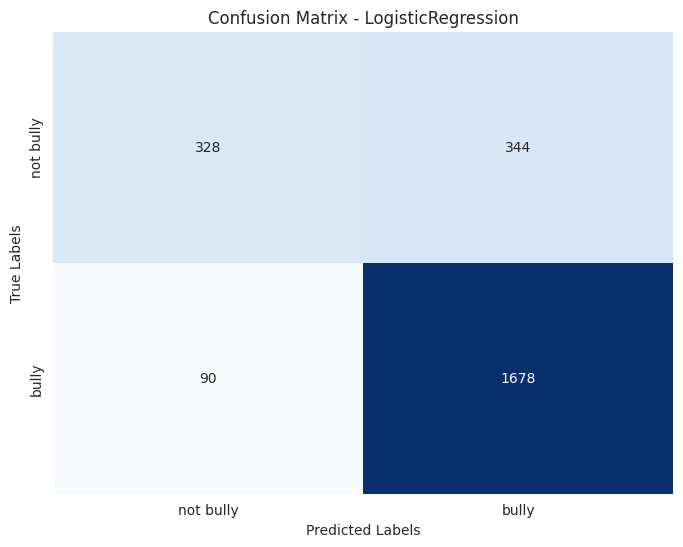

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 # Compute confusion matrix
conf_matrix = confusion_matrix(y_test, lgr_predictions)
 # Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['not bully', 'bully'], yticklabels=['not bully', 'bully'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ' + lgr.__class__.__name__)
plt.show()

#**Random Forest**

Precision of rdf_classifie model:
 0.8231558378114313
Recall of rdf_classifier model:
 0.9530542986425339
F1score of rdf_classifier model:
 0.8833551769331585
Accuracy of rdf_classifier model: 0.8176229508196722
rdf_classifier model Report:
               precision    recall  f1-score   support

           0       0.79      0.46      0.58       672
           1       0.82      0.95      0.88      1768

    accuracy                           0.82      2440
   macro avg       0.81      0.71      0.73      2440
weighted avg       0.81      0.82      0.80      2440



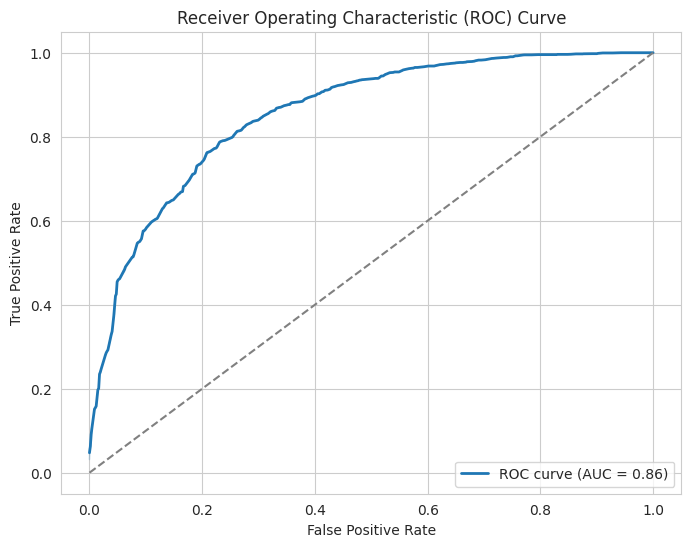

In [ ]:
from sklearn.metrics import classification_report as cls_report
rdf= RandomForestClassifier(random_state=42,n_estimators=100,)
rdf.fit(X_train_text, y_train)
rdf_predictions = rdf.predict(X_test_text)
F1score = f1_score(y_test, rdf_predictions)
Precision= precision_score(y_test, rdf_predictions)
Recall = recall_score(y_test, rdf_predictions)
print("Precision of rdf_classifie model:\n",Precision)
print("Recall of rdf_classifier model:\n", Recall)
print("F1score of rdf_classifier model:\n",F1score)


accuracy = accuracy_score(y_test, rdf_predictions)
print("Accuracy of rdf_classifier model:", accuracy)

# Calculate classification report
report = cls_report(y_test, rdf_predictions)
print("rdf_classifier model Report:\n", report)
y_score = rdf.predict_proba(X_test_text)[:, 1]


# ROC curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

import pandas as pd
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Create the ROC curve plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_df, lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation(10CV)

In [ ]:
scores = cross_val_score(rdf, X_train_text ,y_train, cv=10)
print ("Cross-validated scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validated scores: [0.81693989 0.81238616 0.80418944 0.8064663  0.81785064 0.81602914
 0.81602914 0.81921676 0.81238616 0.81822323]
Mean accuracy: 0.813971685939646


Confusion Matrix

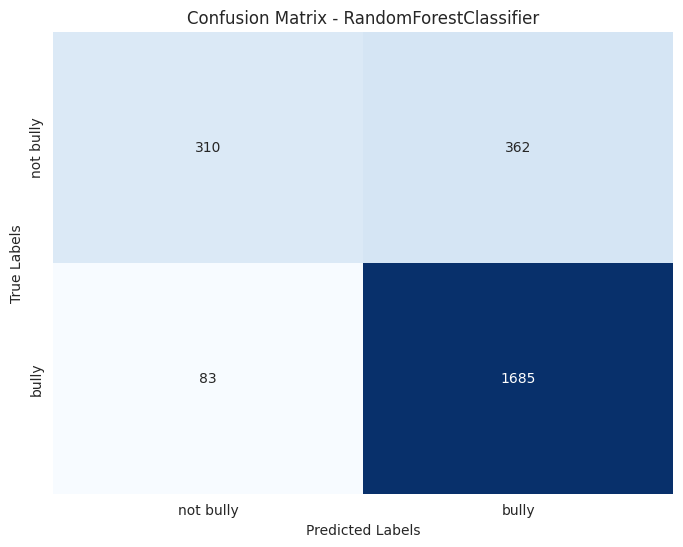

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 # Compute confusion matrix
conf_matrix = confusion_matrix(y_test, rdf_predictions )
 # Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['not bully', 'bully'], yticklabels=['not bully', 'bully'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ' + rdf.__class__.__name__)
plt.show()

#**MultinomialNB**

Precision of MultinomialNB model:
 0.812411179535765
Recall of MultinomialNB model:
 0.9700226244343891
F1score of MultinomialNB model:
 0.8842485176591904
Accuracy of MultinomialNB model: 0.815983606557377
MultinomialNB model Report:
               precision    recall  f1-score   support

           0       0.84      0.41      0.55       672
           1       0.81      0.97      0.88      1768

    accuracy                           0.82      2440
   macro avg       0.83      0.69      0.72      2440
weighted avg       0.82      0.82      0.79      2440



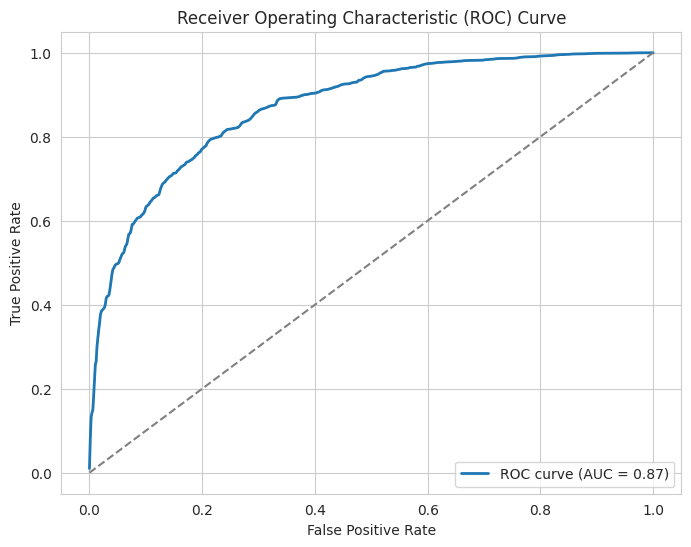

In [ ]:
mnb=MultinomialNB()
mnb.fit(X_train_text, y_train)
mnb_predictions = mnb.predict(X_test_text)
F1score = f1_score(y_test, mnb_predictions)
Precision= precision_score(y_test, mnb_predictions)
Recall = recall_score(y_test, mnb_predictions)
print("Precision of MultinomialNB model:\n",Precision)
print("Recall of MultinomialNB model:\n", Recall)
print("F1score of MultinomialNB model:\n",F1score)


accuracy = accuracy_score(y_test, mnb_predictions)
print("Accuracy of MultinomialNB model:", accuracy)

# Calculate classification report
report = classification_report(y_test, mnb_predictions)
print("MultinomialNB model Report:\n", report)

y_score = mnb.predict_proba(X_test_text)[:, 1]


# ROC curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

import pandas as pd
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Create the ROC curve plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_df, lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation(10CV)

In [ ]:
scores = cross_val_score(mnb, X_train_text ,y_train, cv=10)
print ("Cross-validated scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)


Cross-validated scores: [0.81238616 0.80783242 0.79826958 0.8064663  0.81693989 0.80874317
 0.81648452 0.81739526 0.79690346 0.81457859]
Mean accuracy: 0.8095999352726638


Confusion Matrix

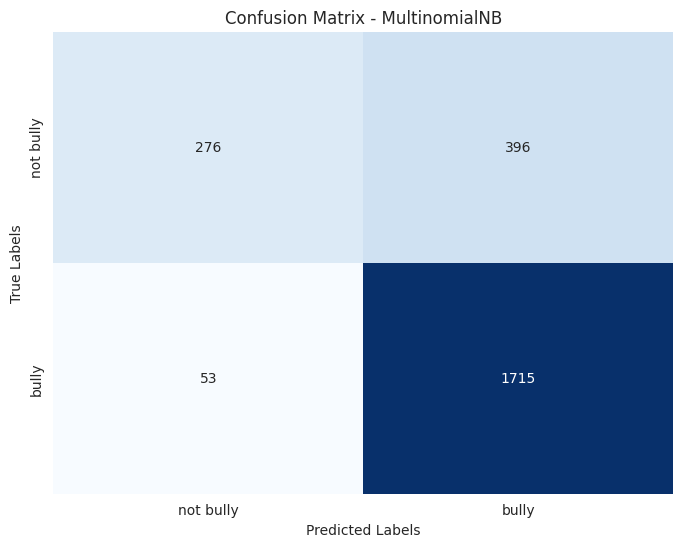

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 # Compute confusion matrix
conf_matrix = confusion_matrix(y_test, mnb_predictions)
 # Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['not bully', 'bully'], yticklabels=['not bully', 'bully'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ' + mnb.__class__.__name__)
plt.show()


#**BaggingClassifier**

Precision of MultinomialNB model:
 0.8461123110151187
Recall of MultinomialNB model:
 0.8863122171945701
F1score of MultinomialNB model:
 0.8657458563535911
Accuracy of MultinomialNB model: 0.8008196721311476
MultinomialNB model Report:
               precision    recall  f1-score   support

           0       0.66      0.58      0.61       672
           1       0.85      0.89      0.87      1768

    accuracy                           0.80      2440
   macro avg       0.75      0.73      0.74      2440
weighted avg       0.79      0.80      0.80      2440



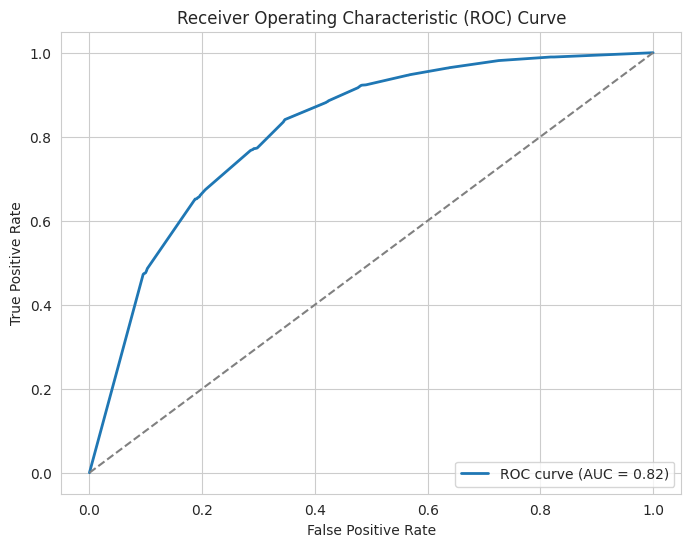

In [ ]:
bgc=BaggingClassifier()
bgc.fit(X_train_text, y_train)
bgc_predictions = bgc.predict(X_test_text)
F1score = f1_score(y_test, bgc_predictions)
Precision= precision_score(y_test, bgc_predictions)
Recall = recall_score(y_test, bgc_predictions)
print("Precision of MultinomialNB model:\n",Precision)
print("Recall of MultinomialNB model:\n", Recall)
print("F1score of MultinomialNB model:\n",F1score)


accuracy = accuracy_score(y_test, bgc_predictions)
print("Accuracy of MultinomialNB model:", accuracy)

# Calculate classification report
report = classification_report(y_test, bgc_predictions)
print("MultinomialNB model Report:\n", report)

y_score = bgc.predict_proba(X_test_text)[:, 1]


# ROC curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

import pandas as pd
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Create the ROC curve plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_df, lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Cross Validation(10 CV)

In [ ]:
scores = cross_val_score(bgc, X_train_text ,y_train, cv=10)
print ("Cross-validated scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validated scores: [0.79052823 0.78916211 0.7791439  0.78961749 0.80692168 0.78961749
 0.79462659 0.80100182 0.7928051  0.79453303]
Mean accuracy: 0.7927957437627329


Confusion Matrix

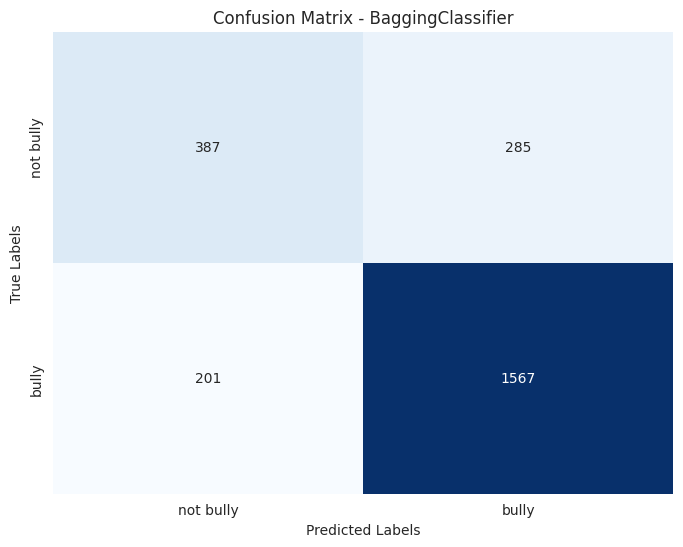

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 # Compute confusion matrix
conf_matrix = confusion_matrix(y_test, bgc_predictions)
 # Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['not bully', 'bully'], yticklabels=['not bully', 'bully'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ' + bgc.__class__.__name__)
plt.show()


#**LinearSVC**

Precision of LinearSVC model:
 0.8502899314707433
Recall of LinearSVC model:
 0.9123303167420814
F1score of LinearSVC model:
 0.880218281036835
Accuracy of LinearSVC model:  0.8200819672131148
LinearSVC model Report:
               precision    recall  f1-score   support

           0       0.71      0.58      0.64       672
           1       0.85      0.91      0.88      1768

    accuracy                           0.82      2440
   macro avg       0.78      0.74      0.76      2440
weighted avg       0.81      0.82      0.81      2440



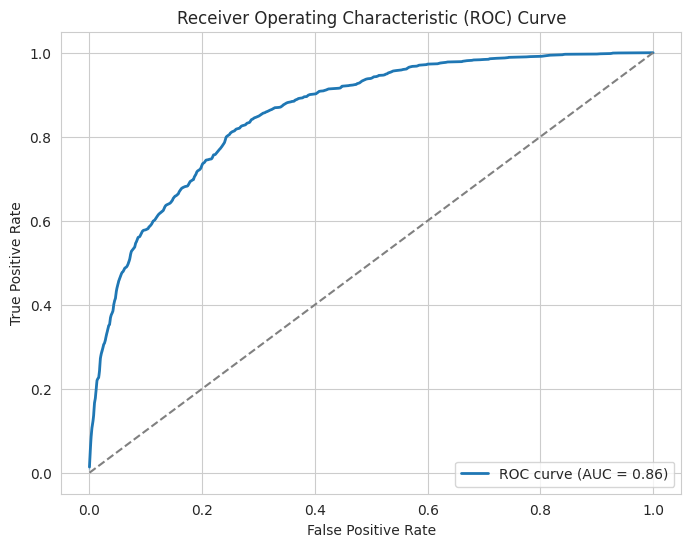

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Initialize and train LinearSVC model
LinearSVC_model = LinearSVC()
LinearSVC_model.fit(X_train_text, y_train)

LinearSVC_model_predictions = LinearSVC_model.predict(X_test_text)
F1score = f1_score(y_test, LinearSVC_model_predictions)
Precision= precision_score(y_test, LinearSVC_model_predictions)
Recall = recall_score(y_test, LinearSVC_model_predictions)
print("Precision of LinearSVC model:\n",Precision)
print("Recall of LinearSVC model:\n", Recall)
print("F1score of LinearSVC model:\n",F1score)
accuracy=LinearSVC_model.score(X_test_text,y_test)
print("Accuracy of LinearSVC model: ",accuracy)
classification_report = classification_report(y_test,LinearSVC_model_predictions)
print("LinearSVC model Report:\n", classification_report)

y_score = LinearSVC_model.decision_function(X_test_text)


# ROC curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

import pandas as pd
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Create the ROC curve plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_df, lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Cross Validation(10CV)

In [ ]:
scores = cross_val_score(LinearSVC_model, X_train_text ,y_train, cv=10)
print ("Cross-validated scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validated scores: [0.81147541 0.80919854 0.79007286 0.80510018 0.81375228 0.80236794
 0.80965392 0.80601093 0.79735883 0.80683371]
Mean accuracy: 0.805182460551593


Confusion Matrix

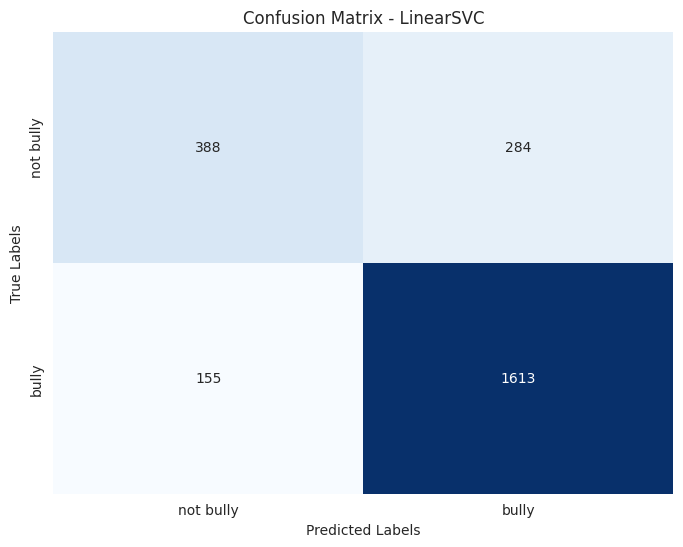

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 # Compute confusion matrix
conf_matrix = confusion_matrix(y_test, LinearSVC_model_predictions)
 # Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['not bully', 'bully'], yticklabels=['not bully', 'bully'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ' + LinearSVC_model .__class__.__name__)
plt.show()


#***SVM***

Precision of svm model:
 0.8333333333333334
Recall of svm model:
 0.9530542986425339
F1score of svm model:
 0.8891820580474934
Accuracy of svm model: 0.8278688524590164
svm model Report:
               precision    recall  f1-score   support

           0       0.80      0.50      0.61       672
           1       0.83      0.95      0.89      1768

    accuracy                           0.83      2440
   macro avg       0.82      0.73      0.75      2440
weighted avg       0.82      0.83      0.81      2440



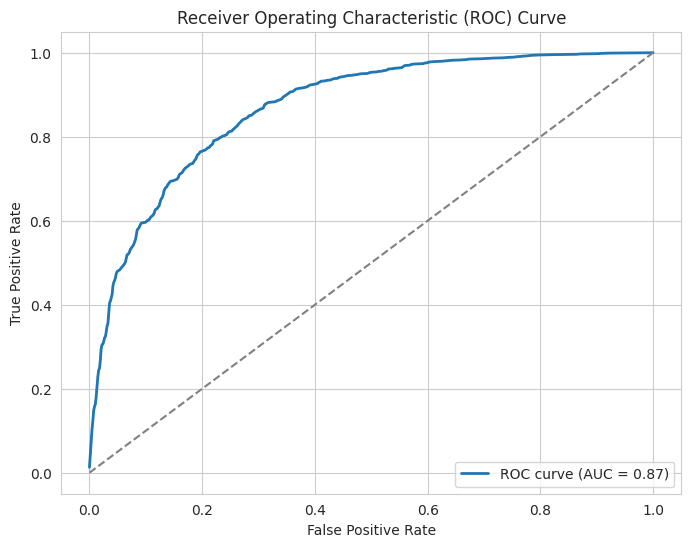

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
# Initialize and train SVM
svm = SVC(probability=True)
svm.fit(X_train_text, y_train)
svm_predictions = svm.predict(X_test_text)
F1score = f1_score(y_test, svm_predictions )
Precision= precision_score(y_test, svm_predictions )
Recall = recall_score(y_test, svm_predictions )
print("Precision of svm model:\n",Precision)
print("Recall of svm model:\n", Recall)
print("F1score of svm model:\n",F1score)


accuracy = accuracy_score(y_test, svm_predictions )
print("Accuracy of svm model:", accuracy)

# Calculate classification report
report = classification_report(y_test, svm_predictions )
print("svm model Report:\n", report)
y_score = svm.predict_proba(X_test_text)[:, 1]


# ROC curve plotting
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = roc_auc_score(y_test, y_score)

import pandas as pd
roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})

# Create the ROC curve plot using Seaborn
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.lineplot(x='FPR', y='TPR', data=roc_df, lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
sns.lineplot(x=[0, 1], y=[0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Cross Validation

In [ ]:
scores = cross_val_score(svm, X_train_text ,y_train, cv=10)
print ("Cross-validated scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validated scores: [0.82513661 0.81830601 0.81102004 0.82149362 0.82513661 0.82240437
 0.8201275  0.82513661 0.81420765 0.8309795 ]
Mean accuracy: 0.8213948533469427


Confusion Matrix

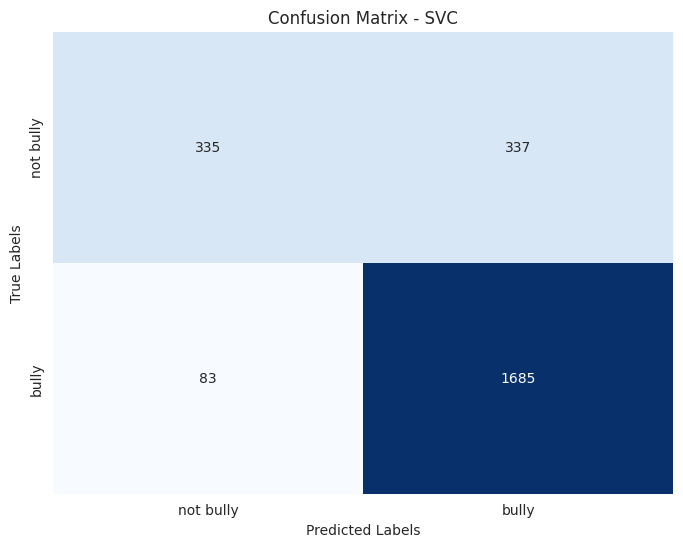

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
 # Compute confusion matrix
conf_matrix = confusion_matrix(y_test, svm_predictions )
 # Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['not bully', 'bully'], yticklabels=['not bully', 'bully'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ' + svm.__class__.__name__)
plt.show()


#**Sentence Length (New)**

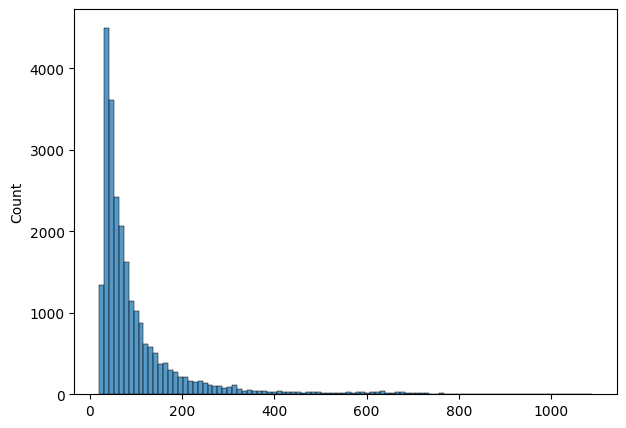

In [65]:
#need equal length sentences
#plot hist of sentence length
plt.figure(figsize=(7, 5))
sns.histplot([len(s) for s in df.comment], bins=100)

plt.show()

#**Explain with XAI**

#**LIME**

In [ ]:
%%capture
!pip3 install lime

In [ ]:
import lime
import lime.lime_tabular

#**Our Test Data**

In [ ]:
sentence1 = preprocessing('অরে বাবা, এই টা কোন পাগল????')

X1 = text_transformer.transform([sentence1])
Y=text_transformer.transform(X_train.values)

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
instance_to_explain = X1

# Initialize LIME explainer
explainer = LimeTabularExplainer(Y, mode="classification",class_names=['not bully', 'bully'])


explanation = explainer.explain_instance(instance_to_explain, lgr.predict_proba,num_features=3)
text = 'Text: অরে বাবা, এই টা কোন পাগল????'
centered_text = text.center(80)  # Adjust the width as needed

print(centered_text)
explanation.show_in_notebook()

                       Text: অরে বাবা, এই টা কোন পাগল????                       


In [ ]:
sentence = preprocessing('সাফা কবির কোন **** বাল...??,')

X= text_transformer.transform([sentence])

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
instance_to_explain = X

# Initialize LIME explainer
explainer = LimeTabularExplainer(Y ,mode="classification",class_names=['not bully', 'bully'])

explanation = explainer.explain_instance(instance_to_explain, lgr.predict_proba,num_features=2)
text = 'Text:সাফা কবির কোন **** বাল...??,'
# Adjust the width as needed

print(text)
print()  # Print an empty line for space below
explanation.show_in_notebook()

Text:সাফা কবির কোন **** বাল...??,



In [ ]:
sentence3 = preprocessing('ছবি তুলে পোষ্ট করা ছাড়া আর কোন কাম কাজ নাই!')

X2= text_transformer.transform([sentence3])

In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
instance_to_explain = X2

# Initialize LIME explainer
explainer = LimeTabularExplainer(Y ,mode="classification",class_names=['not bully', 'bully'])

explanation = explainer.explain_instance(instance_to_explain, lgr.predict_proba,num_features=4)
text = 'Text:ছবি তুলে পোষ্ট করা ছাড়া আর কোন কাম কাজ নাই!'
print(text)
print()
explanation.show_in_notebook()

Text:ছবি তুলে পোষ্ট করা ছাড়া আর কোন কাম কাজ নাই!



In [ ]:
feature_index = [3894,4793,942,4823]

# Find the term associated with the feature index
for index in feature_index:
   term = text_transformer.get_feature_names_out()[index]

   print("Feature index: ",index ,"Term: ",term )

Feature index:  3894 Term:  কর
Feature index:  4793 Term:  ছব
Feature index:  942 Term:  আর
Feature index:  4823 Term:  ছব কর


#**Shap**

In [ ]:
!pip install transformers
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
import transformers
import shap

task = "sentiment-analysis"
# load a transformers pipeline model
model = transformers.pipeline(task, return_all_scores=True)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


`return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.


In [ ]:

# explain the model on two sample inputs
explainer = shap.Explainer(model)
shap_values = explainer(["অরে বাবা, এই টা কোন পাগল"])



  0%|          | 0/462 [00:00<?, ?it/s]


Partition explainer: 2it [00:47, 47.64s/it]               


In [ ]:
# visualize the first prediction's explanation for the POSITIVE output class
shap.plots.text(shap_values[0, :, "POSITIVE"])

#**Performance Matix Analysis**

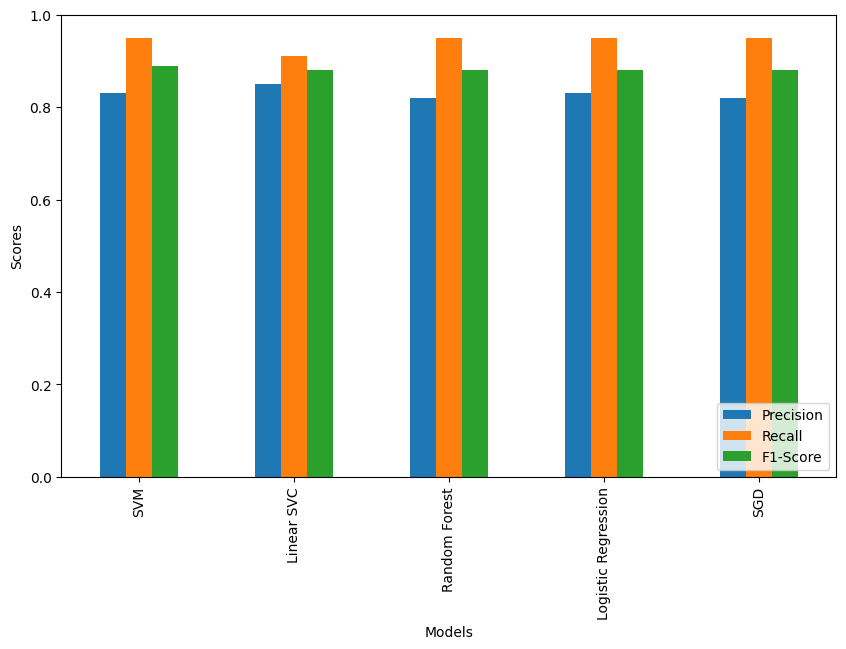

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with the model results
data = {
    'Model': ['SVM', 'Linear SVC', 'Random Forest', 'Logistic Regression', 'SGD'],
    'Precision': [0.83, 0.85, 0.82, 0.83, 0.82],
    'Recall': [0.95, 0.91, 0.95, 0.95, 0.95],
    'F1-Score': [0.89, 0.88, 0.88, 0.88, 0.88]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Model' column as the index
df.set_index('Model', inplace=True)

# Plot the data
df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Models')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Set y-axis limits to 0 and 1
plt.legend(loc='lower right')
plt.show()
